In [24]:
import plotly
import plotly.graph_objects as go
import numpy as np
plotly.__version__

'4.11.0'

# spiral generator

In [34]:
def spiral(n=2000, a=0, b=1, initial=0, angle=2*np.pi, phi=0, noise_frac=0.32):
    '''
    n: data samples
    a: start and end position, please set a=0 to keep no intersections
    b: interval, b<0 will be central symmetry
    initial: start angle
    angle: rotation angle and direction, angle<0, y axis symmetry
    phi: lead-lag angle
    '''
    rng = np.random.RandomState(0)
    theta = rng.uniform(initial,angle,n)
    noise = rng.normal(0.2, noise_frac, (theta.shape))

    r = a + b*theta + noise
    x = r*np.cos(theta+phi)
    y = r*np.sin(theta+phi)
    return x,y



# 2-Spiral Data

In [35]:
# spiral data:
n_sample = 500
noise_frac = 0.4

x1,y1 = spiral(n=n_sample,angle=-2.5*np.pi,phi=1/2*np.pi,a=-1,b=1.1)
x2,y2 = spiral(n=n_sample,angle=-2.5*np.pi,phi=1/2*np.pi,a=1,b=-1.1)

spiral1 = np.vstack((x1,y1)).T
spiral2 = np.vstack((x2,y2)).T

spiralData = np.vstack((spiral1,spiral2)) #600*2
# noise = np.random.normal(0, noise_frac, (spiralData.shape[0],2))
# spiralData += noise # add noise
#spiralData += np.random.randn(spiralData.shape[0],spiralData.shape[1])*noise_frac # add noise
label = np.hstack((np.zeros(n_sample),np.ones(n_sample))).reshape(-1,1) #600*1

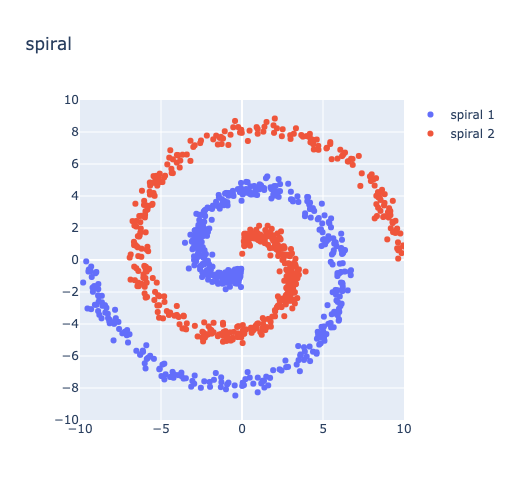

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=spiralData[:n_sample,0], 
                         y=spiralData[:n_sample,1], 
                         mode='markers',
                         name='spiral 1'))
fig.add_trace(go.Scatter(x=spiralData[n_sample:,0], 
                         y=spiralData[n_sample:,1], 
                         mode='markers',
                         name='spiral 2'))

fig.update_layout(autosize=False,width=500,height=500,
                 title="spiral",xaxis={"dtick": 5, "range": [-10, 10]},
                 yaxis={"dtick": 2, "range": [-10, 10]})
fig.show()
